In [1]:
# Input: Defines the input layer of a model and specifies the shape of input data.
# Lambda: Allows you to apply arbitrary expressions or transformations to tensors (e.g., scaling, reshaping).
# Dense: A fully connected layer; often used in the output or intermediate layers.
# Flatten: Converts multi-dimensional tensors (e.g., 2D, 3D) into a 1D array for fully connected layers.
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

# Model: Helps in creating and combining models using functional APIs.
from tensorflow.keras.models import Model

# ResNet50: Pretrained ResNet-50 model. This model is a deep neural network trained on ImageNet, commonly used for feature extraction or fine-tuning.
from tensorflow.keras.applications.resnet50 import ResNet50

# preprocess_input: Applies preprocessing steps (like scaling, normalization) required for ResNet50.
from tensorflow.keras.applications.resnet50 import preprocess_input

# image: Module for working with image data, including loading and processing images.
# ImageDataGenerator: Augments image data (e.g., rotations, flips) and prepares it for training.
# load_img: Loads an image from a specified file path.
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

# Sequential: A simple way to build models layer-by-layer.
from tensorflow.keras.models import Sequential

# glob: Finds files matching a specified pattern (e.g., *.jpg for all JPG images).
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = [224,224]
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [3]:
# [224,224] is Length and width of image and [3] resembles RGB

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [5]:
# Do not train existing weights

for layer in resnet.layers:
    layer.trainable = False

In [6]:
# Useful for getting number of output classes

folders = glob('Datasets/Train/*')

In [7]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [8]:
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs = resnet.input, outputs=prediction)

In [10]:
# View the structure of the model

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,888,771 (91.13 MB)

 Trainable params: 301,059 (1.15 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [11]:
# Tell the model what cost and optimization method to use

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [12]:
# Use the image data generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

# We should not do data augmentation in test data
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure we provide the same target size as initialized for the same size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 247 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 176 images belonging to 3 classes.


In [15]:
# Fit the model 

r = model.fit(training_set,
             validation_data=test_set,
             epochs=50,
             steps_per_epoch = len(training_set),
             validation_steps = len(test_set))

C:\Users\MyPc\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3792 - loss: 5.8345

C:\Users\MyPc\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 79s 9s/step - accuracy: 0.3767 - loss: 5.9261 - val_accuracy: 0.3068 - val_loss: 3.2282
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 78s 10s/step - accuracy: 0.3892 - loss: 3.7030 - val_accuracy: 0.3580 - val_loss: 3.4033
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.3910 - loss: 2.8324 - val_accuracy: 0.4773 - val_loss: 1.5013
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 80s 10s/step - accuracy: 0.5043 - loss: 1.4696 - val_accuracy: 0.5057 - val_loss: 1.7139
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.5321 - loss: 1.1046 - val_accuracy: 0.5398 - val_loss: 1.2131
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 78s 10s/step - accuracy: 0.5497 - loss: 0.9403 - val_accuracy: 0.5170 - val_loss: 1.2047
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 10s/step - accuracy: 0.5774 - loss: 0.8495 - val_accuracy: 0.4659 - val_loss: 1.4608
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 10s/step - accuracy: 0.4429 - loss: 1.3662 - val_accuracy: 0.4091 - val_loss: 1.7339
Epoch 9/50
8

In [16]:
r.history

{'accuracy': [0.3562752902507782,
  0.42510122060775757,
  0.43319839239120483,
  0.4898785352706909,
  0.546558678150177,
  0.5748987793922424,
  0.5506072640419006,
  0.4979757070541382,
  0.5182186365127563,
  0.49392712116241455,
  0.5506072640419006,
  0.5789473652839661,
  0.6356275081634521,
  0.6437246799468994,
  0.6801619529724121,
  0.647773265838623,
  0.7287449240684509,
  0.7570850253105164,
  0.659919023513794,
  0.6113360524177551,
  0.7085019946098328,
  0.7246963381767273,
  0.71659916639328,
  0.6558704376220703,
  0.6680161952972412,
  0.6518218517303467,
  0.7692307829856873,
  0.7530364394187927,
  0.7692307829856873,
  0.7449392676353455,
  0.7004048824310303,
  0.7125505805015564,
  0.6882591247558594,
  0.76113361120224,
  0.7773279547691345,
  0.8097165822982788,
  0.7894737124443054,
  0.8461538553237915,
  0.7773279547691345,
  0.8137651681900024,
  0.7570850253105164,
  0.7408906817436218,
  0.692307710647583,
  0.829959511756897,
  0.8137651681900024,
  0.

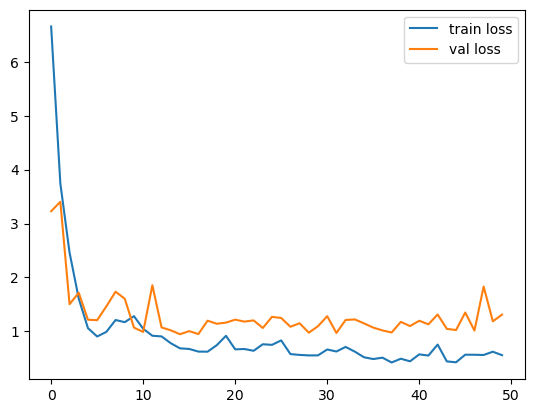

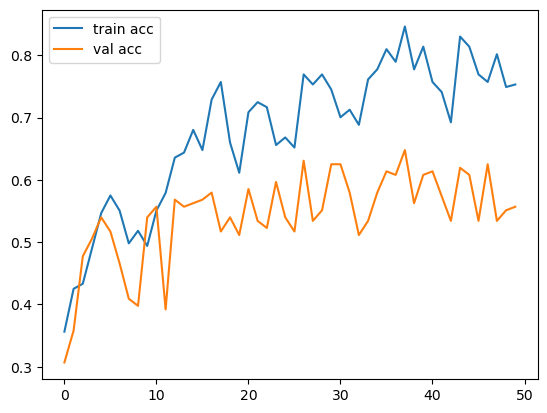

<Figure size 640x480 with 0 Axes>

In [17]:
# Plotting loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_acc')

# Plotting accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# Save it as h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [19]:
y_pred = model.predict(test_set)

6/6 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step


In [20]:
y_pred

array([[9.84585583e-02, 2.28739381e-01, 6.72802031e-01],
       [1.74860388e-01, 4.20507696e-03, 8.20934534e-01],
       [2.80000031e-01, 2.13150196e-02, 6.98685050e-01],
       [1.41102508e-01, 1.71353556e-02, 8.41762125e-01],
       [2.34320965e-02, 7.82157660e-01, 1.94410309e-01],
       [1.47036910e-02, 9.79679763e-01, 5.61656430e-03],
       [1.93545449e-04, 9.87247586e-01, 1.25589091e-02],
       [8.97913277e-02, 1.76379811e-02, 8.92570734e-01],
       [1.87623035e-02, 5.65552533e-01, 4.15685117e-01],
       [8.86371434e-01, 3.83739686e-03, 1.09791137e-01],
       [1.74341589e-01, 1.11620566e-02, 8.14496279e-01],
       [3.95274013e-02, 8.88383925e-01, 7.20886812e-02],
       [1.61580473e-01, 2.64909565e-01, 5.73509932e-01],
       [5.61391652e-01, 2.17132255e-01, 2.21476123e-01],
       [3.54283333e-01, 4.37688291e-01, 2.08028346e-01],
       [2.09487230e-03, 5.60939968e-01, 4.36965168e-01],
       [6.80829724e-03, 8.12553465e-01, 1.80638209e-01],
       [4.68153681e-04, 1.47630

In [21]:
y_pred = np.argmax(y_pred,axis=1)

In [22]:
y_pred

array([2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2],
      dtype=int64)

In [23]:
model = load_model('model_resnet50.h5')

In [24]:
img = image.load_img('Datasets/Train/lamborghini/10.jpg',target_size=(224,224))

In [25]:
x = image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [26]:
x = x/255
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [27]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[2.0494321e-03, 1.0372520e-06, 9.9794954e-01]], dtype=float32)

In [29]:
a = np.argmax(model.predict(img_data),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [30]:
a

array([2], dtype=int64)